In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
# soxx vs soxl
# ung vs boyl
# SOXX and SOXL

In [2]:
tickers = ["SOXX", "SOXL"]
# SOXX = ticker.tickers["SOXX"].history(period="7mo", interval = "1d")
# SOXL = ticker.tickers["SOXL"].history(period="7mo", interval = "1d")
data = yf.download(tickers, period="5y", group_by="ticker", auto_adjust=False)
dat_SOXX = data['SOXX']['Close']
dat_SOXL = data['SOXL']['Close']

[*********************100%***********************]  2 of 2 completed


In [10]:
dates = [d.strftime('%Y-%m-%d') for d in data.index.date]


dfr = pd.DataFrame(data = {'SOXX_Close': dat_SOXX})

dfr.index = dates
dfr["SOXX_per_change"] = 1
dfr["SOXX_cumulative"] = 1
dfr["SOXL_Close"] = dat_SOXL
dfr["SOXL_per_change"] = 1
dfr["SOXL_cumulative"] = 1
dfr["TRIPLE_per_change"] = 1
dfr["TRIPLE_cumulative"] = 1



for i in range(1, len(dat_SOXX)):
    dfr["SOXX_per_change"][i] = dat_SOXX[i] / dat_SOXX[i-1] - 1
    dfr["SOXL_per_change"][i] = dat_SOXL[i] / dat_SOXL[i-1] - 1
    dfr["TRIPLE_per_change"][i] = (dat_SOXX[i] / dat_SOXX[i-1] - 1) *3

    dfr["SOXX_cumulative"][i] = dfr["SOXX_cumulative"][i-1]*(1 + dfr["SOXX_per_change"][i])
    dfr["SOXL_cumulative"][i] = dfr["SOXL_cumulative"][i-1]*(1 + dfr["SOXL_per_change"][i])
    dfr["TRIPLE_cumulative"][i] = dfr["TRIPLE_cumulative"][i-1]*(1 + dfr["TRIPLE_per_change"][i])



# SOXX_per_change = pd.Series([1.0] * len(dat_SOXX))
# spxl_per_change = pd.Series([1.0] * len(dat_spxl))
# triple_per_change = pd.Series([1.0] * len(dat_SOXX))

# SOXX_cumulative = pd.Series([1.0] * len(dat_spy))
# spxl_cumulative = pd.Series([1.0] * len(dat_spxl))
# triple_cumulative = pd.Series([1.0] * len(dat_spy))

/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_30479/3851235555.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfr["SOXX_per_change"][i] = dat_SOXX[i] / dat_SOXX[i-1] - 1
/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_30479/3851235555.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexe

In [11]:
dfr.to_csv('semi.csv')

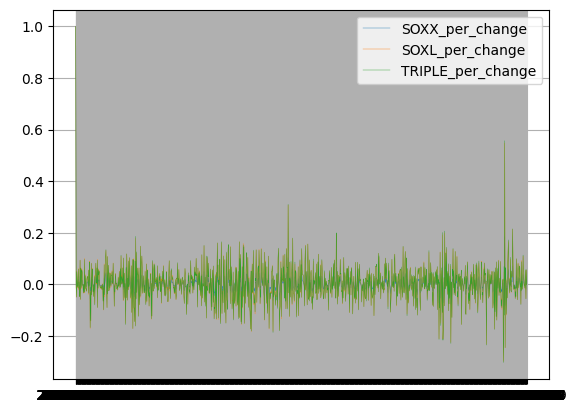

In [12]:
plt.plot(dfr['SOXX_per_change'], label = "SOXX_per_change", linewidth=0.3)
plt.plot(dfr['SOXL_per_change'], label = "SOXL_per_change", linewidth=0.3)
plt.plot(dfr['TRIPLE_per_change'], label = "TRIPLE_per_change", linewidth=0.3)
plt.legend()
plt.grid(True)
plt.show()

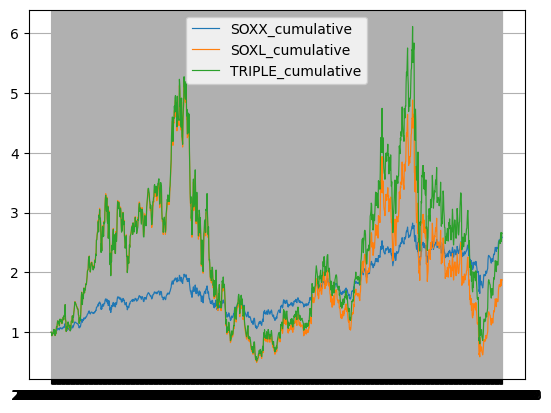

In [13]:
plt.plot(dfr['SOXX_cumulative'], label = "SOXX_cumulative", linewidth=0.85)
plt.plot(dfr['SOXL_cumulative'], label = "SOXL_cumulative", linewidth=0.85)
plt.plot(dfr['TRIPLE_cumulative'], label = "TRIPLE_cumulative", linewidth=0.85)
plt.legend()
plt.grid(True)
plt.show()

/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_30479/2043526308.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfr["Portfolio_SOXX_long"][i] = dfr["SOXX_cumulative"][i]*SOXX_LONG
/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_30479/2043526308.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[ro

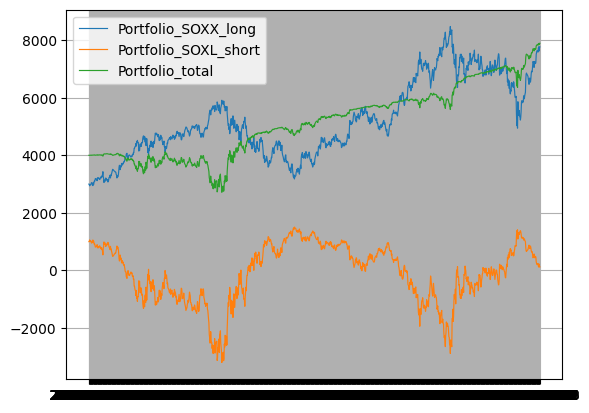

In [ ]:
SOXX_LONG = 3000
SOXL_SHORT = 1000
dfr["Portfolio_total"] = SOXX_LONG+SOXL_SHORT
dfr["Portfolio_SOXX_long"] = SOXX_LONG
#dfr["Portfolio_SOXL_short"] = SOXL_short
dfr['Portfolio_SOXL_short'] = (1000 - 71.1946486 * dfr['SOXL_Close']) 
# dfr['Portfolio_SOXL_short'][0] = 1000

for i in range(1, len(dat_SOXX)):
    dfr["Portfolio_SOXX_long"][i] = dfr["SOXX_cumulative"][i]*SOXX_LONG
    #dfr["Portfolio_SOXL_short"][i] = dfr["Portfolio_SOXL_short"][i-1]*(1 - dfr["SOXL_per_change"][i])
    dfr["Portfolio_total"][i] = dfr["Portfolio_SOXX_long"][i] + dfr["Portfolio_SOXL_short"][i]

dfr.to_csv('semi.csv')
plt.plot(dfr['Portfolio_SOXX_long'], label = "Portfolio_SOXX_long", linewidth=0.85)
plt.plot(dfr['Portfolio_SOXL_short'], label = "Portfolio_SOXL_short", linewidth=0.85)
plt.plot(dfr['Portfolio_total'], label = "Portfolio_total", linewidth=0.85)
plt.legend()
plt.grid(True)
plt.show()


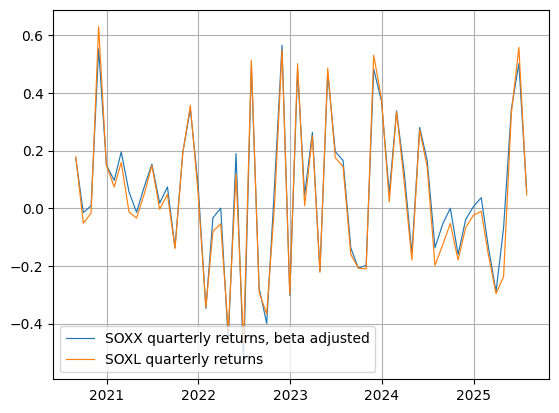

In [3]:
quart_spy = data["SOXX"]['Adj Close'].resample('ME').last().pct_change()
quart_spxl = data["SOXL"]['Adj Close'].resample('ME').last().pct_change()
quart_spy *= 3
plt.plot(quart_spy, label = "SOXX quarterly returns, beta adjusted", linewidth=0.85)
plt.plot(quart_spxl, label = "SOXL quarterly returns", linewidth = 0.85)
plt.legend()
plt.grid(True)
plt.show()


quart_spy = round(quart_spy, 3)
quart_spxl = round(quart_spxl, 3)

d = pd.DataFrame(data = {'SOXX quarterly returns (%)': quart_spy, 'SOXL quarterly returns (%)': quart_spxl})

d.to_csv('semi.csv')
